In [69]:
import numpy as np
import pandas as pd
from os import listdir,getcwd
import matplotlib.pyplot as plt
from functools import partial
%matplotlib inline

In [111]:
zhang_dir = getcwd()+'\\ZhangData'
data = np.zeros(132, dtype=[('neuron_id','a13'),
                                ('raster_data',np.float32,(419,1000)),
                                ('raster_info','a20',4),
                                ('stimulus_id','a15',419),
                                ('stimulus_position','a15',419),
                                ('combined_id_position','a15',419)])

for i,data_dir in enumerate(listdir(zhang_dir)):
    raster_data, raster_info, raster_labels = [zhang_dir+'\\'+data_dir+'\\'+my_dir for my_dir in listdir(zhang_dir+'\\'+data_dir)]
    neuron_id = data_dir[0:(len(data_dir)-12)]
    data_arr = pd.read_csv(raster_data,header=None).values
    labels_arr = pd.read_csv(raster_labels,header=0).values
    if data_arr.shape == (420,1000):
        data_arr = data_arr[0:(len(data_arr)-1)]
        labels_arr = labels_arr[0:(len(labels_arr)-1)]
    data[i] = (neuron_id, data_arr, pd.read_csv(raster_info).values, labels_arr[:,0],labels_arr[:,1],labels_arr[:,2])

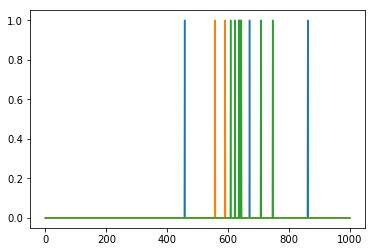

['bp1001spk_01A', 'bp1001spk_02A', 'bp1001spk_03A']

In [41]:
[x[0]  for x in data[['neuron_id']][0:3]]

#Get fourth run from first 3 neurons
[plt.plot(x[0][4]) for x in data[['raster_data']][0:3]]
plt.show()
[x[0] for x in data[['neuron_id']][0:3]]

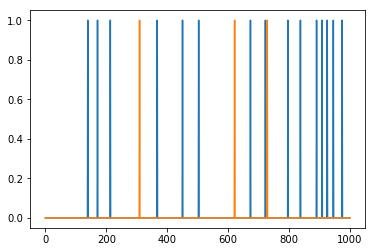

In [48]:
## for multiple neurons
y=[x['raster_data'][x[0]=='hand'] for x in data[['stimulus_id','raster_data']][:][:]]
plt.plot(y[0][0])
plt.plot(y[0][1])
plt.show()
#for single neurons
#[x[:,0] for x in data[['stimulus_id','raster_data']][0][0]]

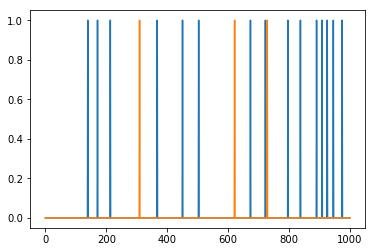

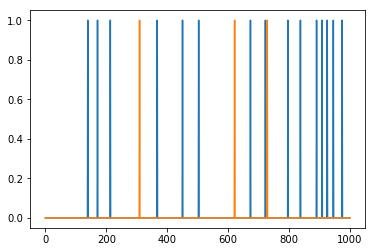

In [53]:
[plt.plot(x) for x in data['raster_data'][0][data['stimulus_id'][0]=='hand'][0:2]]
plt.show()
[plt.plot(x) for x in data['raster_data'][0][[0,9],:]]
plt.show()

In [116]:
def addExponentialDecayToNeuronRead(neuron_read, rate_of_exp_decrease):
    activation = 0.0
    for i,x in enumerate(neuron_read):
        if x==1.0:
            activation+=1.0
        elif ((x==0.0) and (activation>0.0)):
            activation *= rate_of_exp_decrease
        if activation<0.:
            activation=0.
        neuron_read[i]=activation


def addExponentialDecay(speed,d=data):
    addExpDecay = partial(addExponentialDecayToNeuronRead, rate_of_exp_decrease = speed)
    for neuron in d:
        np.apply_along_axis(addExpDecay, axis = 1, arr = neuron['raster_data'])

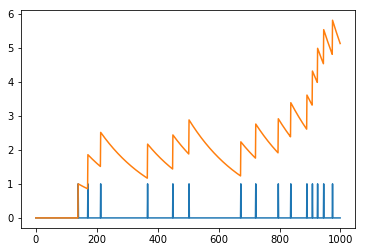

In [55]:
plt.plot(data['raster_data'][0][0,:])
plt.plot(addExponentialDecayToNeuronRead(0.995,data['raster_data'][0][0,:]))
plt.show()

In [117]:
test_data = data_1018.copy()
addExponentialDecay(0.995,test_data)

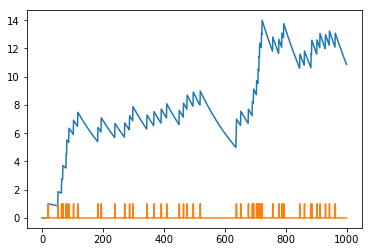

In [121]:
plt.plot(test_data['raster_data'][1][0,:])
plt.plot(data_1018['raster_data'][1][0,:])
plt.show()

In [72]:
seen = dict(zip(np.unique(data['raster_info'][:,3]),np.zeros(21)))
for runid in data['raster_info'][:,3]:
    seen[runid] = seen[runid]+1
    
seen

{'1001': 4.0,
 '1002': 4.0,
 '1003': 6.0,
 '1004': 5.0,
 '1005': 6.0,
 '1006': 7.0,
 '1007': 5.0,
 '1008': 5.0,
 '1009': 6.0,
 '1010': 6.0,
 '1011': 5.0,
 '1012': 5.0,
 '1013': 5.0,
 '1014': 6.0,
 '1015': 9.0,
 '1016': 6.0,
 '1017': 7.0,
 '1018': 11.0,
 '1019': 8.0,
 '1020': 8.0,
 '1021': 8.0}

In [57]:
np.unique(data['stimulus_id'][0])

array(['car', 'couch', 'face', 'flower', 'guitar', 'hand', 'kiwi'], 
      dtype='|S15')

In [58]:
index_1018=data['raster_info'][:,3]=='1018'
index_1018

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [59]:
data['raster_data'][index_1018,:,:].shape

(11L, 419L, 1000L)

In [60]:
index_1018=data['raster_info'][:,3]=='1018'
data_1018 = np.zeros(11, dtype=[('neuron_id','a13'),
                                ('raster_data',np.float32,(419,1000)),
                                ('raster_info','a20',4),
                                ('stimulus_id','a15',419),
                                ('stimulus_position','a15',419),
                                ('combined_id_position','a15',419)])
data_1018[np.arange(11)] = data[index_1018]

In [125]:
np.unique(data_1018['stimulus_id'].flatten())

array(['car', 'couch', 'face', 'flower', 'guitar', 'hand', 'kiwi'], 
      dtype='|S15')

In [127]:
x = np.zeros(2, dtype = (np.float32,(3,4)))

In [163]:
def createTeacherSignal(d=data):
	ind_dict = dict(zip(['car', 'couch', 'face', 'flower', 'guitar', 'hand', 'kiwi'],np.arange(7)))
	teacher_signal = np.zeros(len(d), dtype = (np.float32,(7,419,1000)))
	increase = [1.0/(1.0+np.exp(-0.7*x)) for x in np.linspace(-10,10,100)]
	decrease = [1.0/(1.0+np.exp(0.7*x)) for x in np.linspace(-10,10,100)]
	for i, neuron in enumerate(d):
		for j in np.arange(419):
			stimulus_index = ind_dict[neuron['stimulus_id'][j]]
			stimulus_shown = int(neuron['raster_info'][0])
			teacher_signal[i][stimulus_index][j,stimulus_shown:stimulus_shown+100] = increase
			teacher_signal[i][stimulus_index][j,stimulus_shown+100:stimulus_shown+200] = decrease

	return (teacher_signal)

In [164]:
teach = createTeacherSignal(data_1018)

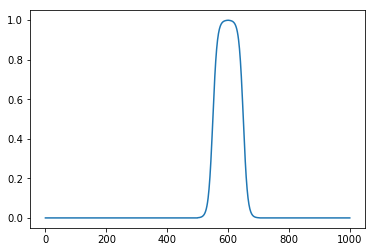

In [153]:
test_sig[stimulus_shown:stimulus_shown+100] = increase
#test_sig[stimulus_shown+40:stimulus_shown+80] = ones
test_sig[stimulus_shown+100:stimulus_shown+200] = decrease
plt.plot(test_sig)
plt.show()

Number of output nodes: 7
Stimulus shown: guitar


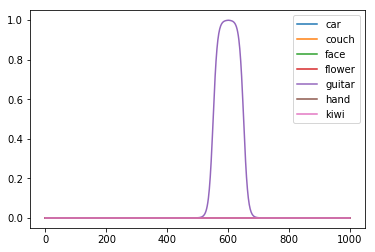

In [191]:
names=['car', 'couch', 'face', 'flower', 'guitar', 'hand', 'kiwi']
stim_num = 8
x = [plt.plot(x[stim_num,:], label = names[i]) for i,x in enumerate(teach[0])]
print('Number of output nodes: '+str(len(x)))
print('Stimulus shown: '+data_1018[0]['stimulus_id'][stim_num])
plt.legend()
plt.show()
